# 绘图

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from pylab import *  
mpl.rcParams['font.sans-serif'] = ['SimHei']  

### 画线
- img：你想要绘制图形的那幅图像。
- color：形状的颜色。以 RGB 为例，需要传入一个元组，例如：（255,0,0）代表蓝色。对于灰度图只需要传入灰度值。
- thickness：线条的粗细。如果给一个闭合图形设置为 -1，那么这个图形就会被填充。默认值是 1.
- linetype：线条的类型， 8 连接，抗锯齿等。默认情况是 8 连接。 cv2.LINE_AA为抗锯齿，这样看起来会非常平滑。

In [2]:
# create a black image
img=np.zeros((512,512,3),np.uint8)

# draw a diagonal blue line with thickness of 5 px
im_line=cv2.line(img,(0,0),(511,511),(255,0,0),5)# 起点，终点，颜色，线宽


In [3]:
winName='line'
cv2.namedWindow(winName,cv2.WINDOW_NORMAL)# 默认值是cv2.WINDOW_AUTOSIZE
cv2.imshow(winName,im_line) # 这里的title需要与之前创建的窗口名字一致，不然会再新建一个窗口
cv2.waitKey(0)
cv2.destroyAllWindows()

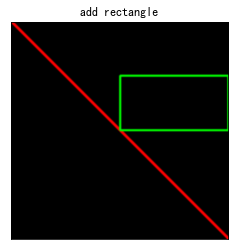

In [4]:
img=cv2.rectangle(img,(256,256),(510,128),(0,255,0),3)#   矩形
plt.imshow(img,cmap='gray',interpolation='bicubic')
plt.title('add rectangle')
plt.xticks([]),plt.yticks([])# hide XY axis
plt.show()



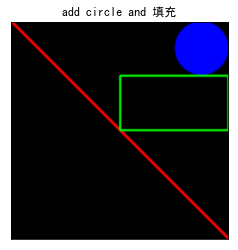

In [5]:
cv2.circle(img,(447,63),63, (0,0,255),-1)  # 圆， -1填充闭合图形
plt.imshow(img,cmap='gray',interpolation='bicubic')
plt.title('add circle and 填充')
plt.xticks([]),plt.yticks([])# hide XY axis
plt.show()


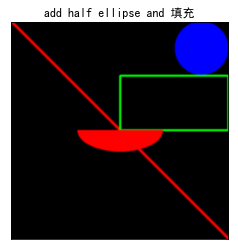

In [6]:
# 椭圆
img=cv2.ellipse(img,(256,256),(100,50),0,0,180,255,-1)
# 中心点，（长轴长，短轴长），逆时针方向旋转的角度0，椭圆弧顺时针方向起始角度（0,180：半个椭圆）
plt.imshow(img,cmap='gray',interpolation='bicubic')
plt.title('add half ellipse and 填充')
plt.xticks([]),plt.yticks([])# hide XY axis
plt.show()

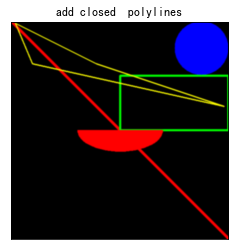

In [7]:
# 多边形
pts=np.array([[10,5],[200,100],[500,200],[50,100]],np.int32) # 数组的数据类型必须为 int32
pts=pts.reshape(1,-1,1,2) # create 1, N,1,2array for N points

# polylines(img, pts, isClosed, color[, thickness[, lineType[, shift]]]) -> img
img=cv2.polylines(img,pts,True,(255,255,0),2)
plt.imshow(img,cmap='gray',interpolation='bicubic')
plt.title('add closed  polylines')
plt.xticks([]),plt.yticks([])# hide XY axis
plt.show()

### 添加文字
- 字体类型（通过查看 cv2.putText() 的文档找到支持的字体）
- 文字的一般属性如颜色，粗细，线条的类型等。为了更好看一点推荐使用  
linetype=cv2.LINE_AA。

**putText(img, text, org, fontFace, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]]) -> img**

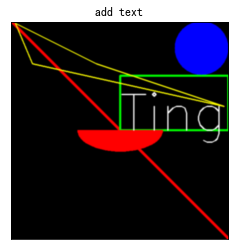

In [8]:
font=cv2.FONT_HERSHEY_SIMPLEX
string='Ting'
cv2.putText(img,string,(256,256),font,4,(255,255,255),2)# 文字，位置(左下角)，字体，大小，颜色
plt.imshow(img,cmap='gray',interpolation='bicubic')
plt.title('add text')
plt.xticks([]),plt.yticks([])# hide XY axis
plt.show()

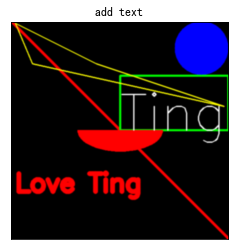

In [9]:
cv2.putText(img,'Love Ting',(10,400),font,2,(255,0,0),10,lineType=cv2.LINE_AA)# 文字，位置(左下角)，字体，大小，颜色
plt.imshow(img,cmap='gray',interpolation='bicubic')
plt.title('add text')
plt.xticks([]),plt.yticks([])# hide XY axis
plt.show()

In [10]:
help(cv2.putText)

Help on built-in function putText:

putText(...)
    putText(img, text, org, fontFace, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]]) -> img
    .   @brief Draws a text string.
    .   
    .   The function cv::putText renders the specified text string in the image. Symbols that cannot be rendered
    .   using the specified font are replaced by question marks. See #getTextSize for a text rendering code
    .   example.
    .   
    .   @param img Image.
    .   @param text Text string to be drawn.
    .   @param org Bottom-left corner of the text string in the image.
    .   @param fontFace Font type, see #HersheyFonts.
    .   @param fontScale Font scale factor that is multiplied by the font-specific base size.
    .   @param color Text color.
    .   @param thickness Thickness of the lines used to draw a text.
    .   @param lineType Line type. See #LineTypes
    .   @param bottomLeftOrigin When true, the image data origin is at the bottom-left corner. Otherwise,
   